In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.options.display.max_colwidth = None


In [3]:
df = pd.read_excel('../data_processed/only_education.xlsx')

In [2]:
df.columns

NameError: name 'df' is not defined

##### Stopwords 

In [98]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [99]:
stop_words = stopwords.words('english')

In [100]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

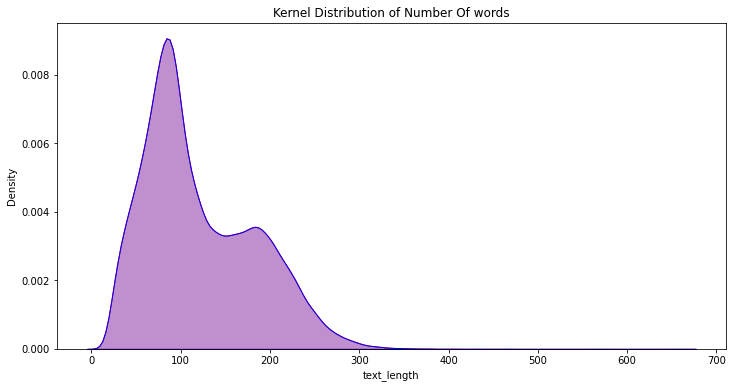

In [102]:
plt.figure(figsize=(12,6))
plt=sns.kdeplot(df['text_length'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
plt=sns.kdeplot(df['text_length'], shade=True, color="b")

##### sentiment

In [103]:
from textblob import TextBlob
def score_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [104]:
def score_polarity(text):
    return TextBlob(text).sentiment.polarity 

In [105]:
def score_polarity(text):
    return TextBlob(text).sentiment.polarity 

In [113]:
def get_sentiment_score(text):
    if text > 0:
        return 'positive'
    elif text == 0:
        return 'neutral'
    else:
        return 'negative'

In [114]:
df['polarity'] = df['text'].apply(score_subjectivity)
df['subjectivity'] = df['text'].apply(score_subjectivity)
df['sentiment1'] = df['polarity'].apply(get_sentiment_score)

In [116]:
df.head(2)

,text,name,created_at,gender,ethnic,label,sentiment,text_length,num_words,polarity,subjectivity,sentiment1
0,today internal educational woman day fifteen million afghan woman are practically exluded from education by the taliban,callmeraha13,2023-03-08,female,hazarah,1,positive,100,12,0.125,0.125,positive
1,"assist girls' education by purchasing books, as Rashidyar did to support his daughter's education.",callmeraha13,2023-02-24,female,hazarah,1,positive,92,13,0.000,0.000,neutral


A subjectivity score of 0.1250 indicates that the text is objective, meaning it is based on facts and does not contain any personal opinions or biases. A score of 1.0 would indicate complete subjectivity, meaning the text is entirely based on personal opinions or beliefs.

A subjectivity score of 0.5 indicates that the text is neither objective nor subjective, but rather somewhere in the middle. It suggests that the text contains some subjective language or opinions, but also includes some objective statements or facts.

The score of 0.125 polarity indicates a slightly negative sentiment. Polarity ranges from -1 to 1, where -1 indicates a completely negative sentiment and 1 indicates a completely positive sentiment. A polarity score of 0 indicates a neutral sentiment.

In [149]:
df[['text', 'label', 'polarity', 'subjectivity', 'sentiment1']].sample(5)

,text,label,polarity,subjectivity,sentiment1
54896,voice afghanistan woman need heard afternoon instructive meeting afghanistan woman leader forum,0,0.000000,0.000000,neutral
19475,chaman gate young afghanistan girl left behind family speaks persian remember name father name contact number reuniversityte family help three hundred fifteen one million eight hundred eighteen thousand one hundred fifty,0,0.366667,0.366667,positive
82574,expect dishonorable seller wear woman good,0,0.600000,0.600000,positive
57531,universityted education local afghanistan employee child abducted unknown gunman killed person traveling khairkhana morning kabul afghanistan,1,0.200000,0.200000,positive
51523,mashaallah friend done hea,0,0.000000,0.000000,neutral


In [126]:
temp = df.groupby('sentiment1').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment1,text
1,positive,66738
0,neutral,22773


In [128]:
temp = df.groupby('sentiment1').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp['percentage'] = temp['text'] / len(df) * 100
temp.style.background_gradient(cmap='Purples')

,sentiment1,text,percentage
1,positive,66738,74.558434
0,neutral,22773,25.441566


In [139]:
print(df['name'].unique())

['callmeraha13' 'AKhodadad' 'alinazary' 'Azadi_English' 'Farid_Senzai'
 'LNajafizada' 'marziababakarkh' 'MohebMudessir' 'ObaidullaBaheer'
 'saadmohseni' 'SarabiHabiba' 'sashna111' 'shabnamHkhan' 'ShafiqaKhplwak'
 'Sibghat_Ah' 'sonia_niazi6' 'thedaoudnaji' 'waliarian' 'zala_zazai'
 'AhmadyWaheed' 'nabilamusleh' 'SarwarDanesh_61' 'SayedSamiSadat'
 'SerajMahbouba' 'sharif_rasikh' 'sohailherwie' 'ZakariaSarkhosh'
 'Fawziakoofi77' 'J_A_shemalsharq' 'ajalali' 'AKS_400' 'iampanjshiri'
 'IslamYarZadran2' 'KarzaiH' 'LinaAhmadi5' 'MHaneefAtmar'
 'NasibullahHamee' 'RohullR' 'RoyaRahmani' 'SafiaAlkozay'
 'SE_afghanistanWGH' 'SofiaSo19560372' 'Zarifa_Ghafari'
 'Mohammad Hali am Fidai' 'Moska Sangar NiazayðŸ‡¦ðŸ‡«' 'Nabila Musleh'
 'Dr Nilofar Ebrahi ami' 'Ni amatullah (ni amat313)'
 'Inayatullah Khwarazmi(Omer_Mansoor7)' 'Qais Alamdar'
 'Qari Abdul Sattar Saeed(qarisa3eed)' 'Qari Yousaf Ahmadi'
 'Rahmatullah Andar' 'Rana Azad' 'Amb.Roya Rahmani' 'Said Khalid Sadat'
 'Sami Sadat' 'Shabnam Salehi' 'S

AttributeError: 'NoneType' object has no attribute 'len'